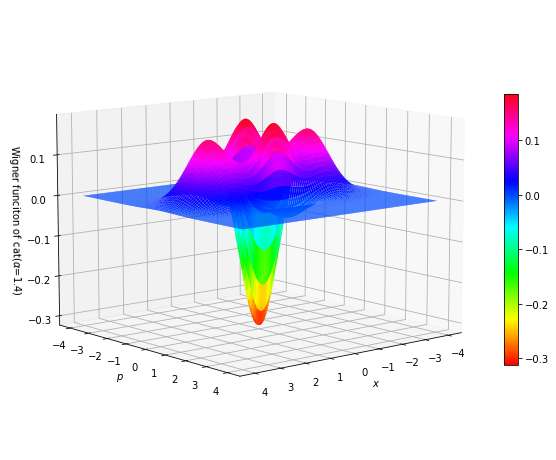

In [30]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.view_init(10, 50)

x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)
xx, yy = np.meshgrid(x,y)

alpha = 1.4
cat_wigner = np.frompyfunc(lambda x,y,x0,y0: np.exp(-(x-x0)**2 -(y-y0)**2 ) + np.exp(-(x+x0)**2 -(y+y0)**2 ) -2*np.exp(-x**2 - y**2)*np.cos(2*(x0*y -y0*x)), 4, 1)

x0 = np.sqrt(2)*alpha.real
y0 = np.sqrt(2)*alpha.imag
cat = cat_wigner(xx,yy,x0,y0).astype(np.double)/(2*np.pi*(1-np.exp(-2*abs(alpha)**2)))

surf = ax.plot_surface(xx, yy, cat, cmap='hsv', linewidth=0,antialiased=True, rcount=100, ccount=100,shade=True)
fig.colorbar(surf, shrink=0.5)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p$')
ax.set_zlabel(r'Wigner funciton of cat($\alpha$=1.4)')

fig.savefig('wigner.pdf')

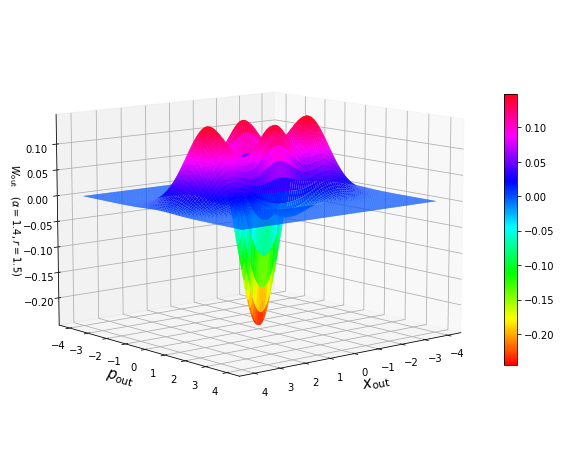

In [31]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')
ax.view_init(10, 50)

x      = np.linspace(-4,4,100)
y      = np.linspace(-4,4,100)
xx, yy = np.meshgrid(x,y)

alpha = 1.4
r     = 1.5
cat_wigner1 = np.frompyfunc(lambda x,y,x0,y0,r: np.exp(-np.exp(2*r)/(1+np.exp(2*r))*((x-x0)**2 +(y-y0)**2) ), 5, 1)
cat_wigner2 = np.frompyfunc(lambda x,y,x0,y0,r: np.exp(-np.exp(2*r)/(1+np.exp(2*r))*((x+x0)**2 +(y+y0)**2) ), 5, 1)
cat_wigner3 = np.frompyfunc(lambda x,y,x0,y0,r: -2 * np.exp(-1/(1+np.exp(2*r))*((x0)**2 +(y0)**2) ) * np.exp(-np.exp(2*r)/(1+np.exp(2*r))*((x)**2 +(y)**2) ) * np.cos( np.exp(2*r)/(1+np.exp(2*r))*2*(x0*y - y0*x) )  , 5, 1)

x0  = np.sqrt(2)*alpha.real
y0  = np.sqrt(2)*alpha.imag
cat = (cat_wigner1(xx,yy,x0,y0,r) + cat_wigner2(xx,yy,x0,y0,r) + cat_wigner3(xx,yy,x0,y0,r)).astype(np.double)/(2*np.pi*(1-np.exp(-2*abs(alpha)**2)))/(1+np.exp(-2*r))

surf = ax.plot_surface(xx, yy, cat, cmap='hsv', linewidth=0,antialiased=True, rcount=100, ccount=100,shade=True)
fig.colorbar(surf, shrink=0.5)

ax.set_xlabel(r'$x_\mathrm{out}$', size=15)
ax.set_ylabel(r'$p_\mathrm{out}$', size=15)
ax.set_zlabel(r'$W_\mathrm{out}\quad(\alpha=1.4, r=1.5)$', size=10)

fig.savefig('wigner_cat_tele.pdf')

便利なソート関数

In [25]:
zips = sorted([i for i in zip([2,1,3],['b','c','a'])], key = lambda x: x[0],reverse=False)
num, alphabet = map(list,zip(*zips))
print(num)
print(alphabet)

[1, 2, 3]
['c', 'b', 'a']


便利なメッシュグリッド

In [32]:
xx, yy = np.meshgrid([1,2,3],['a','b','c'])
print(xx)
print(yy)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[['a' 'a' 'a']
 ['b' 'b' 'b']
 ['c' 'c' 'c']]
